# Introduction to networks

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import IFrame, display

In [2]:
nx.__version__

'2.5'

## Basic concepts

A network (graph) ia a collection of nodes (vertices) and a collection of links (edges) joining two nodes. 

This is a undirected, unweighted network:

In [6]:
IFrame('images/toy_net_2.pdf', width=400, height=400)

Let's construct an undirected network by hand.

In [7]:
G = nx.Graph()

Adding nodes:

In [9]:
G.add_node(1)
G.add_node(2)
G.add_node(3)
G.add_node(4)
G.add_nodes_from([5, 6, 7, 8, 9, 10, 11])

Many ways to adding edges:

In [10]:
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 4)
G.add_edge(2, 3)
G.add_edge(2, 4)
G.add_edge(3, 4)

nx.add_path(G, [4, 5, 6, 7, 8])

nx.add_cycle(G, [8, 9, 10, 11])
G.add_edges_from([(8, 10), (9, 11)])

How many nodes and edges in the network?

In [11]:
G.number_of_nodes()

11

In [12]:
G.number_of_edges()

16

What are the nodes:

In [13]:
G.nodes()

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11))

NodeView is an object which we can iterate:

In [14]:
list(G.nodes())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [15]:
list(G)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

What are the edges:

In [17]:
G.edges()

EdgeView([(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (8, 11), (8, 10), (9, 10), (9, 11), (10, 11)])

Again, we can iterate over it to get a list of edges. Each edge is represented as a tuple.

In [18]:
list(G.edges())

[(1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4),
 (4, 5),
 (5, 6),
 (6, 7),
 (7, 8),
 (8, 9),
 (8, 11),
 (8, 10),
 (9, 10),
 (9, 11),
 (10, 11)]

In [23]:
IFrame('images/toy_net_2.pdf', width=400, height=400)

The **neighbor** of a node is the nodes to which it connects.

To get the neighbor of a node:

In [19]:
G.neighbors(4)

In [20]:
list(G.neighbors(4))

[1, 2, 3, 5]

Another way to get the neighbor:

In [21]:
G[4]

AtlasView({1: {}, 2: {}, 3: {}, 5: {}})

In [22]:
list(G[4])

[1, 2, 3, 5]

The **degree** of a node is the number of links that are incident to the node.

What's the degree of node 4?

In [24]:
G.degree(4)

4

Get the degrees of all nodes:

In [25]:
G.degree()

DegreeView({1: 3, 2: 3, 3: 3, 4: 4, 5: 2, 6: 2, 7: 2, 8: 4, 9: 3, 10: 3, 11: 3})

In [26]:
dict(G.degree())

{1: 3, 2: 3, 3: 3, 4: 4, 5: 2, 6: 2, 7: 2, 8: 4, 9: 3, 10: 3, 11: 3}

**Degree distribution** - The distribution of the degrees of all the nodes in a network.

Degree distribution $p(k)$: the probability that a randomly chosen node has degree k.

$$p(k)=\frac{\text{number of nodes with degree }k}{\text{number of nodes}}$$

Create a Pandas `Series` to store the degree of each node. The index of the Series is a node, and the value is its degree:

In [27]:
node_degree = pd.Series(dict(G.degree()), name='degree')
node_degree

1     3
2     3
3     3
4     4
5     2
6     2
7     2
8     4
9     3
10    3
11    3
Name: degree, dtype: int64

How many nodes have degree 2, 3, and 4:

In [28]:
node_degree.value_counts()

3    6
2    3
4    2
Name: degree, dtype: int64

To normalize it to get a distribution:

In [30]:
node_degree.value_counts(normalize=True).sort_index()

2    0.272727
3    0.545455
4    0.181818
Name: degree, dtype: float64

Then just have a little bar chart:

<AxesSubplot:xlabel='degree', ylabel='probability'>

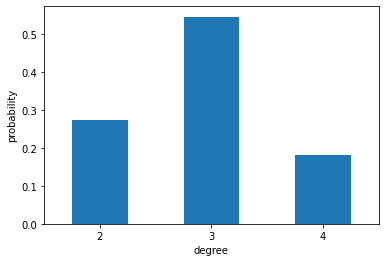

In [31]:
node_degree.value_counts(normalize=True).sort_index().plot.bar(xlabel='degree', 
                                                               ylabel='probability', 
                                                               rot=0,
                                                              )

An **adjacency matrix** is a $N \times N$ matrix to represent a network. Each row (column) corresponds to a node, representing its connection to all other nodes.

In [32]:
nx.adjacency_matrix(G)

<11x11 sparse matrix of type '<class 'numpy.int64'>'
	with 32 stored elements in Compressed Sparse Row format>

In [33]:
nx.adjacency_matrix(G).todense()

matrix([[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]])

Of course, we need to plot the network:

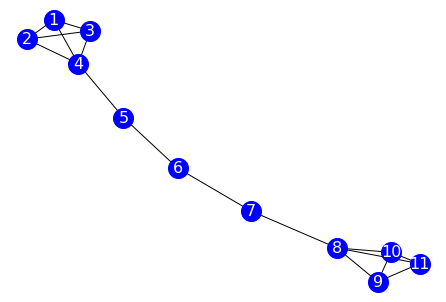

In [35]:
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=400,
        font_color='white',
        font_size=16,
       )

Finally, a **connected component (CC)** is a set of nodes that are connected with each other. For the network above, we have only 1 CC.

How many CC in the network?

In [42]:
nx.number_connected_components(G)

1

What are the CC?

In [43]:
nx.connected_components(G)

<generator object connected_components at 0x7f89ebac6a40>

It's a generator, we can always use `list` to store the generated elements:

In [44]:
G_cc = list(nx.connected_components(G))

In [45]:
len(G_cc)

1

So we have 1 CC, and its nodes are:

In [46]:
G_cc[0]

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

Let's add one edge to G:

In [47]:
G.add_edge(12, 13)

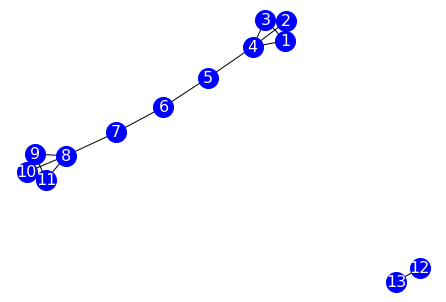

In [48]:
nx.draw(G,
        with_labels=True,
        node_color='blue',
        node_size=400,
        font_color='white',
        font_size=16,
       )

How many CC do we have?

In [49]:
G_cc = list(nx.connected_components(G))

In [50]:
len(G_cc)

2

The nodes in the first and the second CC:

In [51]:
G_cc[0]

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

In [52]:
G_cc[1]

{12, 13}

The CC with the largest number of nodes is called largest connected component (LCC). We can get its nodes like this:

In [53]:
G_lcc = max(nx.connected_components(G), key=len)

In [54]:
G_lcc

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}

The subgraph induced by LCC is:

In [55]:
G_lcc_net = G.subgraph(G_lcc)

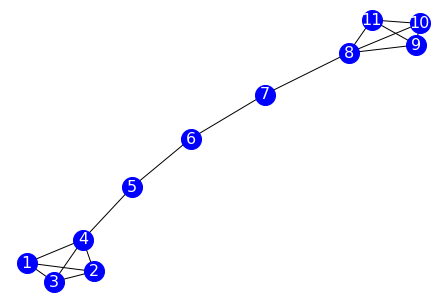

In [56]:
nx.draw(G_lcc_net,
        with_labels=True,
        node_color='blue',
        node_size=400,
        font_color='white',
        font_size=16,
       )

## Weighted network

Let's add some complications to networks. First, links can have weights. For example, in collaboration network, each node is a scientist, and a link represents collaboration relationship. You may collaborate with a scientist only once or many many times. Weight can represent this.

We can create a weight network just like before:

In [3]:
W = nx.Graph()

When adding an edge, we can specify its weight.

We don't really have to add nodes explicitly, and they will be added when adding edges.

In [4]:
W.add_edge(1, 2, weight=4)
W.add_edge(1, 3, weight=8)
W.add_edge(1, 4, weight=2)
W.add_edge(2, 3, weight=1)
W.add_edge(2, 4) # default weight is 1
W.add_edge(3, 4)

nx.add_path(W, [4, 5, 6, 7, 8], weight=1)

nx.add_cycle(W, [8, 9, 10, 11], weight=2)
W.add_edges_from([(8, 10), (9, 11)], weight=4)

In [39]:
nx.adjacency_matrix(W).todense()

matrix([[0, 4, 8, 2, 0, 0, 0, 0, 0, 0, 0],
        [4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [8, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 2, 4, 2],
        [0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 4],
        [0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 2],
        [0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0]])

Now, what's the degree of a node? If we consider weight, we often call the **strength** of a node. It is the total weights of the links incident to the node.

In [40]:
W.degree()

DegreeView({1: 3, 2: 3, 3: 3, 4: 4, 5: 2, 6: 2, 7: 2, 8: 4, 9: 3, 10: 3, 11: 3})

This is still the unweighted version. To consider weight:

In [41]:
W.degree(weight='weight')

DegreeView({1: 14, 2: 6, 3: 10, 4: 5, 5: 2, 6: 2, 7: 2, 8: 9, 9: 8, 10: 8, 11: 8})

Can you plot the weighted degree distribution as a bar chart?

<AxesSubplot:xlabel='Weighted degree (strength)', ylabel='Probability'>

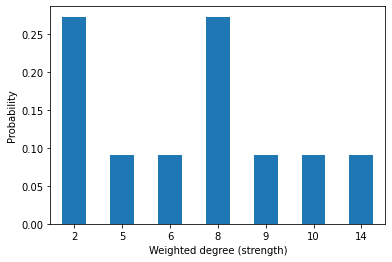

In [7]:
# TODO

Instead of showing bar chart, we can also use scatter plot:

<AxesSubplot:xlabel='strength', ylabel='probability'>

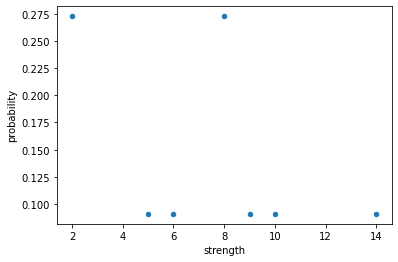

In [15]:
pd.Series(dict(W.degree(weight='weight')), name='probability').value_counts(normalize=True).sort_index()\
.to_frame().reset_index().rename(columns={"index": "strength"}).plot.scatter(x='strength', y='probability')

## Directed network

Links can also have directions. For example, in a citation network, a node is a paper, and a directed link from paper A to paper B means A cites B.

Create a directed network:

In [57]:
D = nx.DiGraph()

In [58]:
D.add_edge(1, 2, w=4) # now this edge points from 1 to 2
D.add_edge(2, 3, w=8) # instead of calling the weight as "weight", let's call it "w"
D.add_edge(3, 4)
D.add_edge(1, 4, w=2, formed='2020-8-30') # we can add any types of properties with arbitrary names

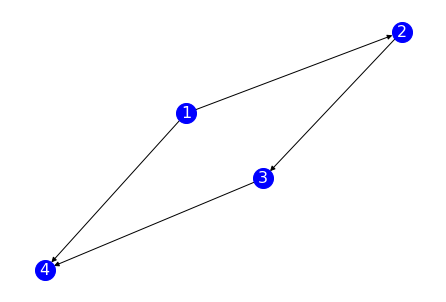

In [59]:
nx.draw(D,
        with_labels=True,
        node_color='blue',
        node_size=400,
        font_color='white',
        font_size=16,
       )

In [60]:
nx.adjacency_matrix(D).todense()

matrix([[0, 1, 0, 1],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0]])

This doesn't consider the weight. Take a look at the [`adjacency_matrix`](https://networkx.org/documentation/stable/reference/generated/networkx.linalg.graphmatrix.adjacency_matrix.html) method? How can we get the weighted adjacency matrix?

In [61]:
# TODO

matrix([[0, 4, 0, 2],
        [0, 0, 8, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0]])

Since there are directions, a node can have in-degree and out-degree. 

In [62]:
D.in_degree(3)

1

In [63]:
D.in_degree()

InDegreeView({1: 0, 2: 1, 3: 1, 4: 2})

In [64]:
D.out_degree()

OutDegreeView({1: 2, 2: 1, 3: 1, 4: 0})

Again, how can we get the weighted in-degree and out-degree?

In [65]:
# TODO: weighted in-degree

InDegreeView({1: 0, 2: 4, 3: 8, 4: 3})

In [66]:
# TODO: weighted out-degree

OutDegreeView({1: 6, 2: 8, 3: 1, 4: 0})